In [48]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL # Image Library
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [49]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

In [50]:
data_dir

'.\\datasets\\flower_photos'

In [51]:
import pathlib 
data_dir = pathlib.Path(data_dir)
data_dir  # converts to a windowsPath

WindowsPath('datasets/flower_photos')

In [52]:
list(data_dir.glob('*/*.jpg'))

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1031799732_e7f4008c03.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10391248763_1d16681106_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437754174_22ec990b77_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437770546_8bb6f7bdd3_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437929963_bc13eebe0c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466290366_cc72e33532.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466558316_a7198b87e2.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1

In [53]:
image_count = len(list(data_dir.glob('*/*.jpg'))) # gets all images

In [54]:
roses = list(data_dir.glob('roses/*')) # gets all roses imgs
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

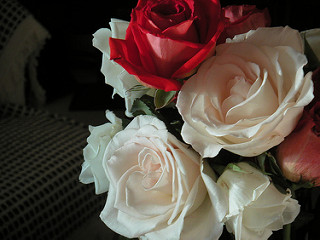

In [55]:
PIL.Image.open(str(roses[1]))

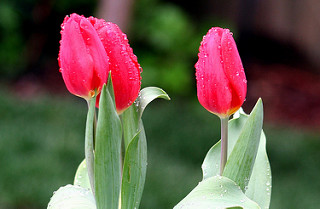

In [56]:
tulips = list(data_dir.glob("tulips/*"))
PIL.Image.open(str(tulips[0]))

In [57]:
flowers_image_dict = {
    'roses' : list(data_dir.glob("roses/*")),
    'daisy' : list(data_dir.glob("daisy/*")),
    'dandelion' : list(data_dir.glob("dandelion/*")),
    'sunflowers' : list(data_dir.glob('sunflowers/*')),
    'tulips' : list(data_dir.glob("tulips/*"))
}

In [58]:
flowers_image_dict['roses']

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/11102341464_508d558dfc_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11233672494_d8bf0a3dbf_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11694025703_9a906fedc1_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/118974357_0faa23cce9_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11944957684_2cc806276e.jpg'),
 WindowsPath('datasets/flower_photos/roses/12045735155_42547ce4e9_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/12165480946_c4a3fe182d_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/12202373204_34fb07205b.jpg'),
 WindowsPath('datasets/flower_photos/

In [59]:
flowers_labels_dict = {
    'roses':0,
    "daisy":1,
    "dandelion":2,
    'sunflowers':3,
    'tulips':4
}

In [60]:
str(flowers_image_dict['roses'][0])

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [61]:
img = cv2.imread(str(flowers_image_dict['roses'][0])) # must use str because cv2 don't read windows path
img

array([[[ 0, 15,  6],
        [ 0, 15,  6],
        [ 0, 17,  8],
        ...,
        [24, 51, 31],
        [25, 52, 32],
        [26, 53, 33]],

       [[ 7, 22, 14],
        [ 7, 22, 14],
        [ 6, 21, 13],
        ...,
        [20, 46, 30],
        [23, 49, 33],
        [25, 51, 35]],

       [[12, 23, 15],
        [12, 23, 15],
        [11, 22, 14],
        ...,
        [20, 42, 30],
        [23, 45, 33],
        [26, 48, 36]],

       ...,

       [[19, 30, 27],
        [14, 24, 18],
        [12, 20, 13],
        ...,
        [ 4, 13,  3],
        [ 0,  8,  1],
        [ 0,  5,  0]],

       [[19, 30, 28],
        [18, 27, 24],
        [15, 23, 16],
        ...,
        [ 3, 12,  2],
        [ 1,  9,  2],
        [ 0,  7,  2]],

       [[ 9, 19, 19],
        [17, 25, 24],
        [22, 29, 24],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 11,  4]]], dtype=uint8)

In [62]:
cv2.resize(img,(180,180)).shape # we need to resize all imgs to 1 dims

(180, 180, 3)

In [63]:
X,y = [],[]

for flower_name,images in flowers_image_dict.items():
    print(flower_name)
    print(len(images))
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

roses
641
daisy
633
dandelion
898
sunflowers
699
tulips
799


In [64]:
X = np.array(X)
y = np.array(y)

In [65]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [66]:
X_train_scaled = X_train / 255 # for scaling
X_test_scaled = X_test / 255

In [69]:
from tensorflow import keras
from tensorflow.keras import models

clf = models.Sequential([
    # CNN Feature Extraction
    keras.layers.Conv2D(16, 3, padding='same', activation='relu'),  # 16 filters and 3x3
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(32, 3, padding='same', activation='relu'),  # 32 filters and 3x3
    keras.layers.MaxPooling2D(), # deafult is (2,2)
    keras.layers.Conv2D(64, 3, padding='same', activation='relu'),  # 64 filters and 3x3
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(), # to make it 1D array

    # Classification Layers
    keras.layers.Dense(128, activation='relu'),  # 128 neurons
    keras.layers.Dense(5)  # number of classes is 5, default activation is linear
])

clf.compile(optimizer='adam',
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
            # should be normalized by the softmax function internally to compute the loss
            metrics=['accuracy'])

clf.fit(X_train_scaled, y_train, epochs=30)  # The Accuracy is way to high 99%

Epoch 1/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 30s 291ms/step - accuracy: 0.3830 - loss: 1.4738
Epoch 2/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 27s 297ms/step - accuracy: 0.5694 - loss: 1.0610
Epoch 3/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 25s 268ms/step - accuracy: 0.6313 - loss: 0.9334
Epoch 4/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 28s 309ms/step - accuracy: 0.7226 - loss: 0.7260
Epoch 5/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 24s 266ms/step - accuracy: 0.7947 - loss: 0.5314
Epoch 6/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 27s 295ms/step - accuracy: 0.8788 - loss: 0.3389
Epoch 7/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 40s 283ms/step - accuracy: 0.9343 - loss: 0.2038
Epoch 8/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 28s 302ms/step - accuracy: 0.9722 - loss: 0.1125
Epoch 9/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 27s 288ms/step - accuracy: 0.9857 - loss: 0.0577
Epoch 10/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 26s 286ms/step - accuracy: 0.9902 - loss: 0.0470
Epoch 11/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 26s 281ms/step - accuracy: 0.9872 - loss: 0.0591
Epoch 12/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 26

In [72]:
clf.evaluate(X_test_scaled,y_test) # and in the test sample its 60% , overfitting

23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - accuracy: 0.6636 - loss: 2.0448


[1.991052269935608, 0.6580381393432617]

In [74]:
y_pred = clf.predict(X_test_scaled)

23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step


In [75]:
score = tf.nn.softmax(y_pred[0]) # to normalize the loses 
score 

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([3.9846154e-07, 9.9999905e-01, 5.0259609e-07, 2.7352003e-13,
       7.9513027e-09], dtype=float32)>

In [76]:
np.argmax(score)

1

In [77]:
y_test[0]

1

# Data Augmention

In [89]:
data_aug = keras.Sequential([
    layers.RandomZoom(0.3)  # Randomly zoom images by up to 30%
])

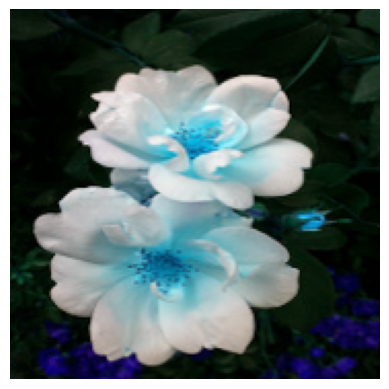

In [90]:
plt.axis('off')
plt.imshow(X[0])

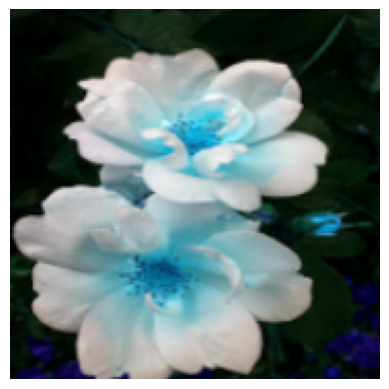

In [91]:
plt.axis('off')
plt.imshow(data_aug(X)[0].numpy().astype("uint8"))

In [92]:
data_aug = keras.Sequential([
    layers.RandomContrast(0.9), # adjusts Contrast
])

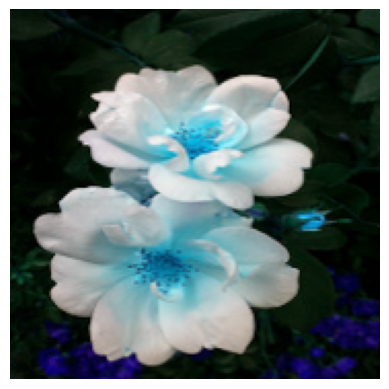

In [93]:
plt.axis('off')
plt.imshow(X[0])

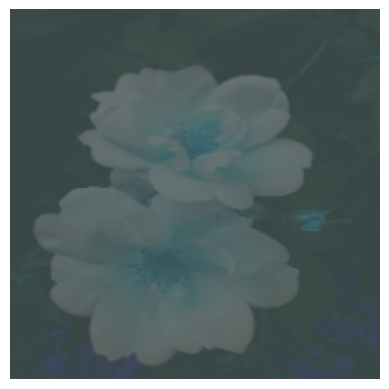

In [94]:
plt.axis('off')
plt.imshow(data_aug(X)[0].numpy().astype("uint8"))

In [95]:
data_aug = keras.Sequential([
    layers.RandomRotation(0.2), # adjusts Contrast
])

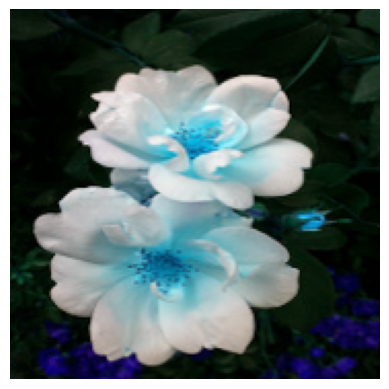

In [96]:
plt.axis('off')
plt.imshow(X[0])

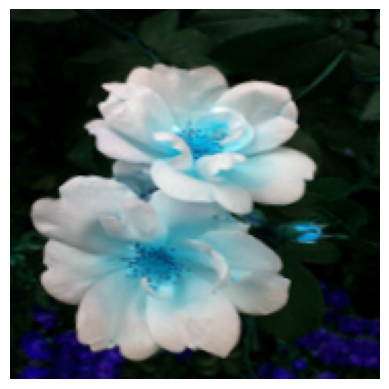

In [97]:
plt.axis('off')
plt.imshow(data_aug(X)[0].numpy().astype("uint8"))

In [99]:
data_aug = keras.Sequential(
  [
    layers.RandomFlip("horizontal", 
                   input_shape=(180, 
                    180,
                     3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

C:\Users\mustafa\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


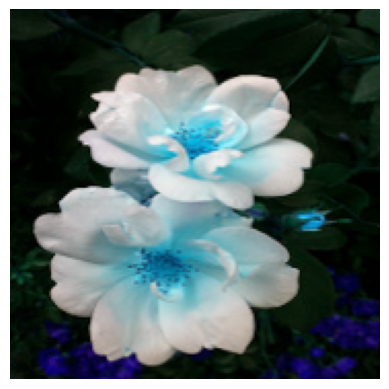

In [100]:
plt.axis('off')
plt.imshow(X[0])

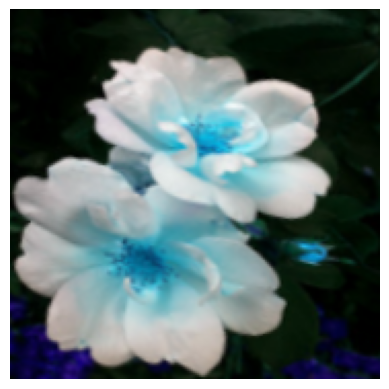

In [102]:
plt.axis('off')
plt.imshow(data_aug(X)[0].numpy().astype("uint8"))

In [103]:
from tensorflow import keras
from tensorflow.keras import models

clf = models.Sequential([
    data_aug,
    # CNN Feature Extraction
    keras.layers.Conv2D(16, 3, padding='same', activation='relu'),  # 16 filters and 3x3
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(32, 3, padding='same', activation='relu'),  # 32 filters and 3x3
    keras.layers.MaxPooling2D(), # deafult is (2,2)
    keras.layers.Conv2D(64, 3, padding='same', activation='relu'),  # 64 filters and 3x3
    keras.layers.MaxPooling2D(),
    keras.layers.Dropout(0.2), # drops 20% layers and gives more balanced fit
    keras.layers.Flatten(), # to make it 1D array

    # Classification Layers
    keras.layers.Dense(128, activation='relu'),  # 128 neurons
    keras.layers.Dense(5)  # number of classes is 5, default activation is linear
])

clf.compile(optimizer='adam',
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
            # should be normalized by the softmax function internally to compute the loss
            metrics=['accuracy'])

clf.fit(X_train_scaled, y_train, epochs=15)  # The Accuracy lowered abit but now testing set higher

Epoch 1/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 40s 367ms/step - accuracy: 0.3565 - loss: 1.5556
Epoch 2/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 33s 357ms/step - accuracy: 0.5465 - loss: 1.1154
Epoch 3/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 33s 355ms/step - accuracy: 0.6266 - loss: 0.9726
Epoch 4/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 33s 357ms/step - accuracy: 0.6561 - loss: 0.8866
Epoch 5/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 34s 370ms/step - accuracy: 0.6825 - loss: 0.8035
Epoch 6/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 34s 369ms/step - accuracy: 0.7025 - loss: 0.7745
Epoch 7/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 34s 368ms/step - accuracy: 0.7251 - loss: 0.7038
Epoch 8/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 32s 344ms/step - accuracy: 0.7410 - loss: 0.6739
Epoch 9/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 31s 342ms/step - accuracy: 0.7525 - loss: 0.6511
Epoch 10/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 32s 343ms/step - accuracy: 0.7643 - loss: 0.6205
Epoch 11/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 31s 341ms/step - accuracy: 0.7593 - loss: 0.6308
Epoch 12/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 32

In [105]:
clf.evaluate(X_test_scaled,y_test) # here score is 70%

23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.7155 - loss: 0.8641


[0.8493679165840149, 0.7070844769477844]